In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('prices.csv', index_col=0, parse_dates=True)
test_data = data[data.index >= '2024-01-01']
test_returns = np.log(test_data / test_data.shift(1)).dropna()

In [3]:
vol_forecasts = pd.read_csv('garch_vol_forecasts.csv', index_col=0, parse_dates=True)

In [4]:
train_data = data[(data.index >= '2015-01-01') & (data.index <= '2023-12-31')]
train_returns = np.log(train_data / train_data.shift(1)).dropna()
inverse_vol = 1 / train_returns.std()
static_weights = inverse_vol / inverse_vol.sum()


/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [6]:
dynamic_weights = 1 / vol_forecasts
dynamic_weights = dynamic_weights.div(dynamic_weights.sum(axis=1), axis=0)

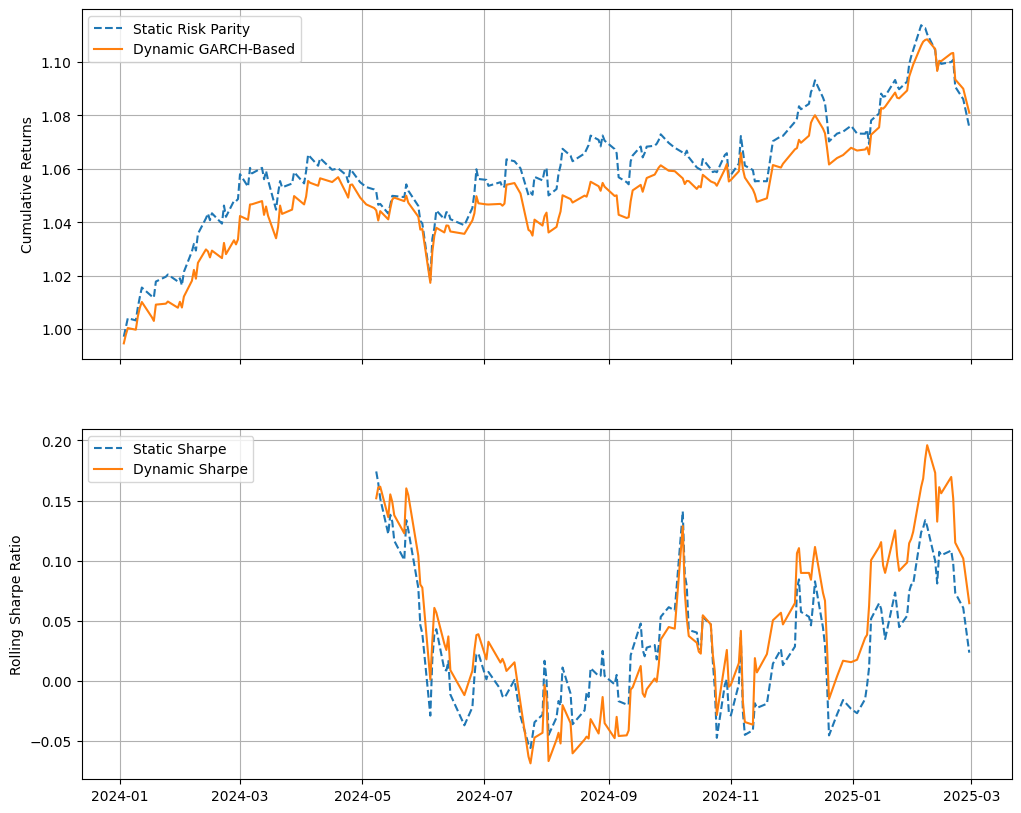

In [15]:
# Plot cumulative returns
fig,axs= plt.subplots(2, 1, figsize=(12, 10), sharex=True)

static_cum = (1 + static_portfolio).cumprod()
dynamic_cum = (1 + dynamic_portfolio).cumprod()

axs[0].plot(static_cum, label='Static Risk Parity', linestyle='--')
axs[0].plot(dynamic_cum, label='Dynamic GARCH-Based', linestyle='-')
axs[0].set_ylabel('Cumulative Returns')
axs[0].legend()
axs[0].grid(True)

rolling_window = 60
risk_free = 0.04 / 252
static_excess = static_portfolio - risk_free
dynamic_excess = dynamic_portfolio - risk_free

static_sharpe = static_excess.rolling(rolling_window).mean() / static_excess.rolling(rolling_window).std()
dynamic_sharpe = dynamic_excess.rolling(rolling_window).mean() / dynamic_excess.rolling(rolling_window).std()

axs[1].plot(static_sharpe, label='Static Sharpe', linestyle='--')
axs[1].plot(dynamic_sharpe, label='Dynamic Sharpe', linestyle='-')
axs[1].set_ylabel('Rolling Sharpe Ratio')
axs[1].legend()
axs[1].grid(True)



In [16]:
plt.tight_layout()
plt.savefig('portfolio_comparison_with_sharpe.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [41]:
static_portfolio = pd.Series(static_portfolio, index=returns.index[len(returns.index)-len(dynamic_portfolio):])
dynamic_portfolio = pd.Series(dynamic_portfolio, index=returns.index[len(returns.index)-len(dynamic_portfolio):])

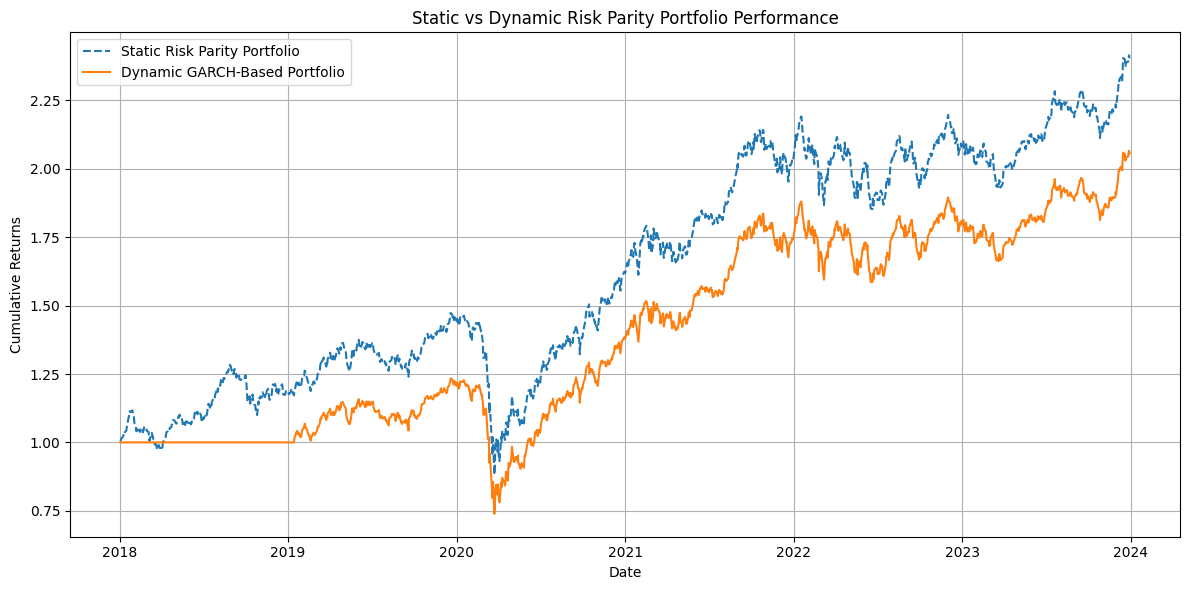

In [44]:
plt.figure(figsize=(12,6))
plt.plot(static_cum, label='Static Risk Parity Portfolio', linestyle='--')
plt.plot(dynamic_cum, label='Dynamic GARCH-Based Portfolio', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.title('Static vs Dynamic Risk Parity Portfolio Performance')
plt.tight_layout()



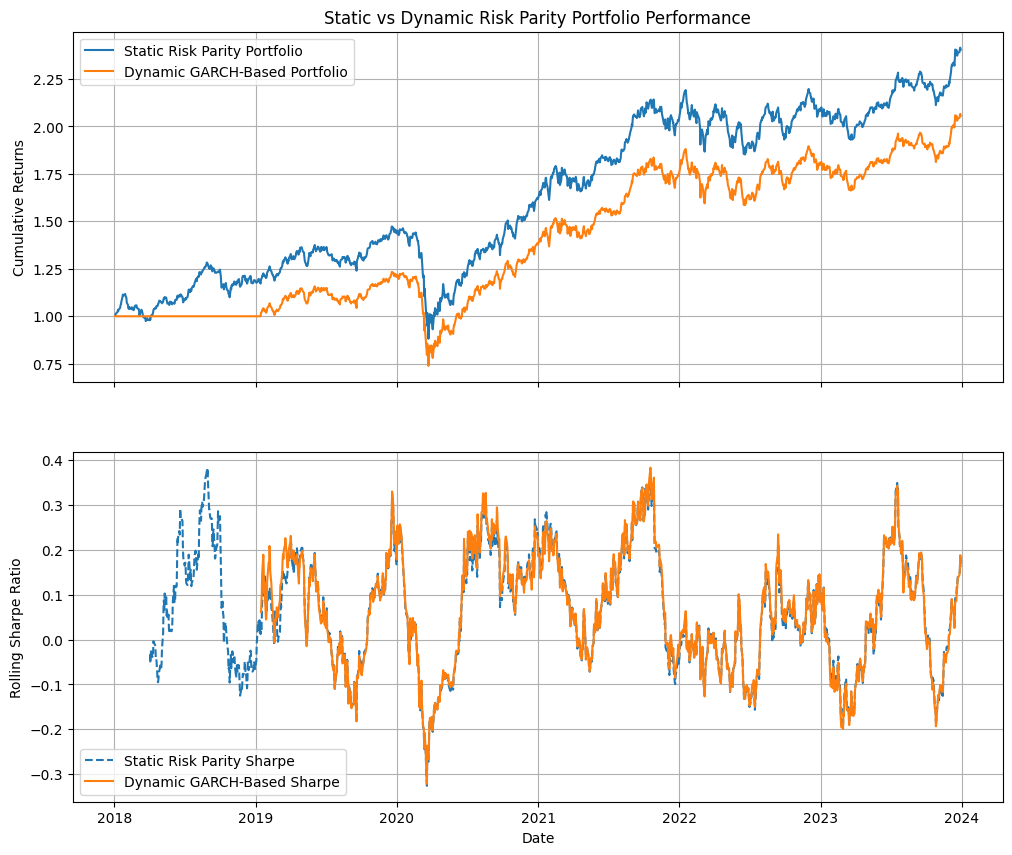

In [46]:
# Calculate rolling Sharpe Ratio
rolling_window = 60  # ~3 months
risk_free_rate = 0.04 / 252  # Approx daily risk-free rate, adjust for India if needed.

static_excess = static_portfolio - risk_free_rate
dynamic_excess = dynamic_portfolio - risk_free_rate

static_sharpe = static_excess.rolling(rolling_window).mean() / static_excess.rolling(rolling_window).std()
dynamic_sharpe = dynamic_excess.rolling(rolling_window).mean() / dynamic_excess.rolling(rolling_window).std()

# Plotting cumulative returns and rolling Sharpe ratio
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Subplot 1: Cumulative Returns
axs[0].plot(static_cum, label='Static Risk Parity Portfolio', linestyle='-')
axs[0].plot(dynamic_cum, label='Dynamic GARCH-Based Portfolio', linestyle='-')
axs[0].set_ylabel('Cumulative Returns')
axs[0].set_title('Static vs Dynamic Risk Parity Portfolio Performance')
axs[0].legend()
axs[0].grid(True)

# Subplot 2: Rolling Sharpe Ratio
axs[1].plot(static_sharpe, label='Static Risk Parity Sharpe', linestyle='--')
axs[1].plot(dynamic_sharpe, label='Dynamic GARCH-Based Sharpe', linestyle='-')
axs[1].set_ylabel('Rolling Sharpe Ratio')
axs[1].set_xlabel('Date')
axs[1].grid(True)
axs[1].legend()


In [18]:
plt.tight_layout()
plt.savefig('portfolio_comparison_with_sharpe.png')
plt.show()

<Figure size 640x480 with 0 Axes>